In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


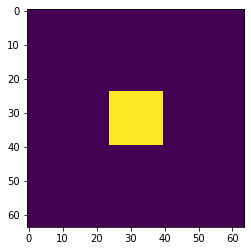

In [11]:
s1 = 64
s2 = 16
s2h = s2 // 2
target = np.zeros((s1, s1)).astype(np.uint8)
cx = target.shape[0] // 2
cy = target.shape[1] // 2
target[cy-s2h:cy+s2h, cx-s2h:cx+s2h] = 255

plt.figure()
plt.imshow(target)
plt.show()

In [12]:
currents = []
for dx in range(0, target.shape[0]):
    current = np.zeros((s1, s1)).astype(np.uint8)
    cx = dx
    cy = current.shape[0] // 2
    current[cy-s2h:cy+s2h, cx-s2h:cx+s2h] = 255
    currents.append(current)
print(len(currents))

64


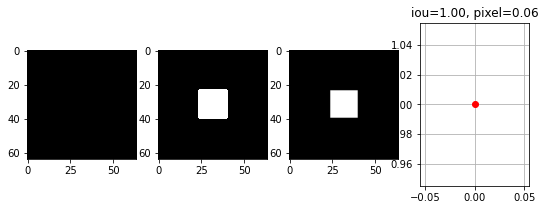

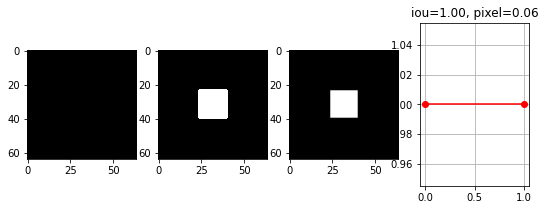

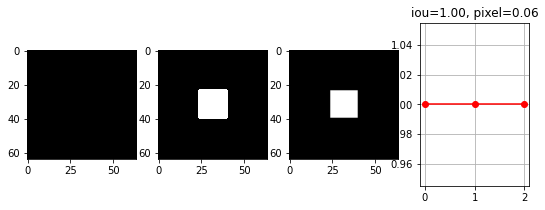

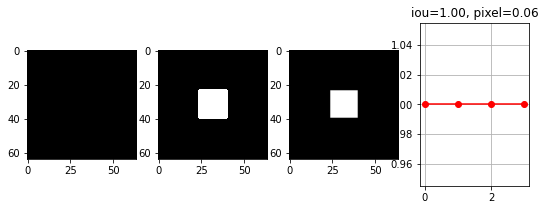

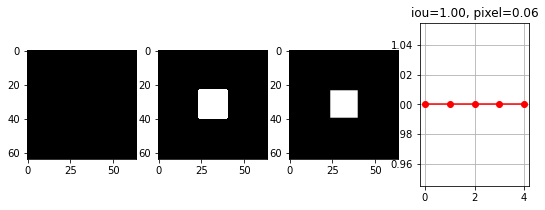

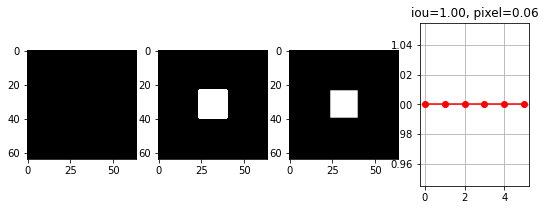

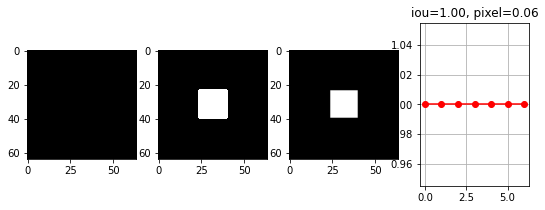

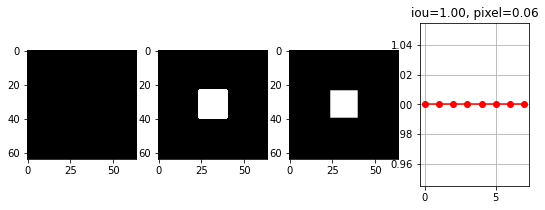

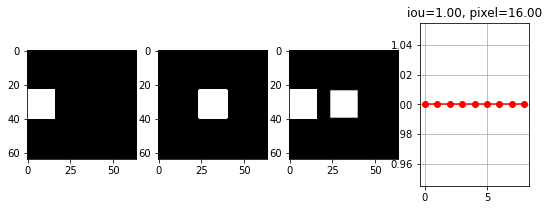

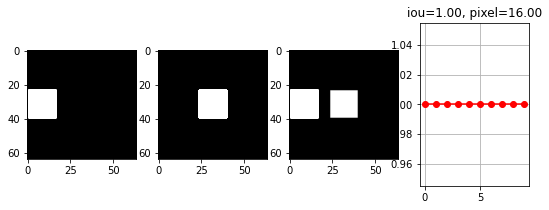

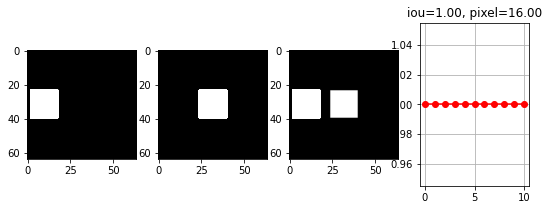

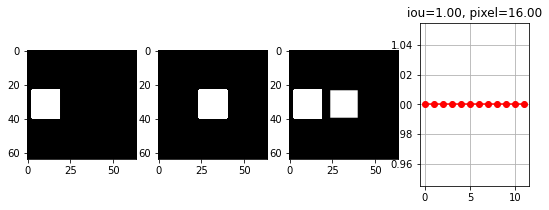

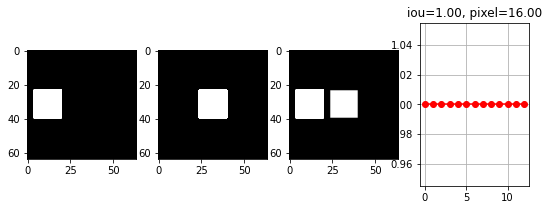

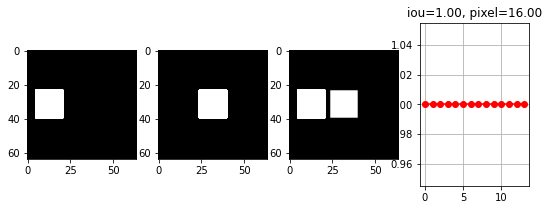

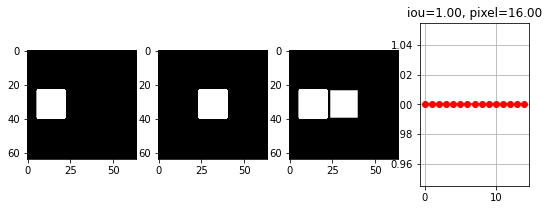

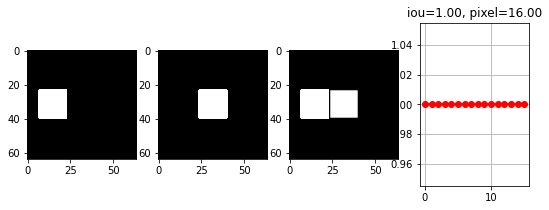

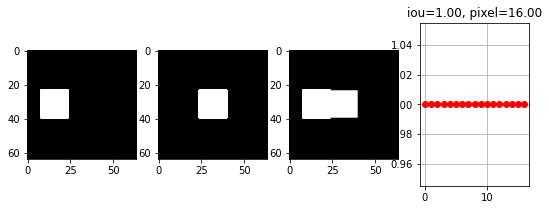

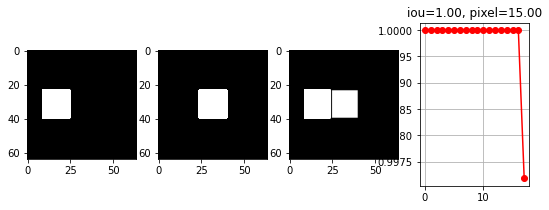

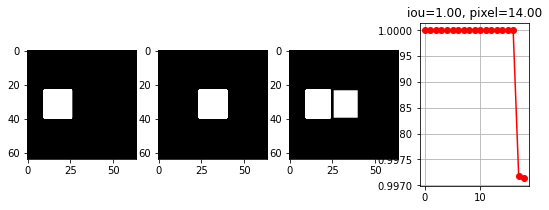

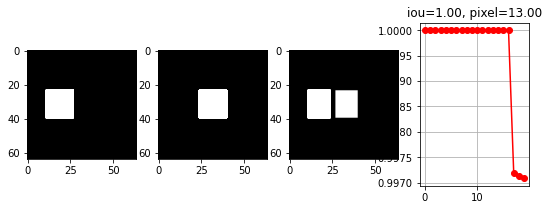

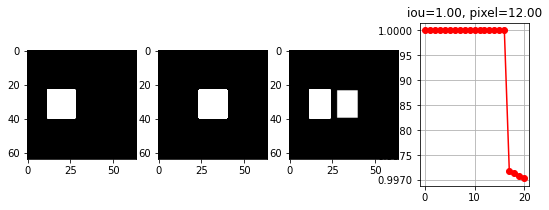

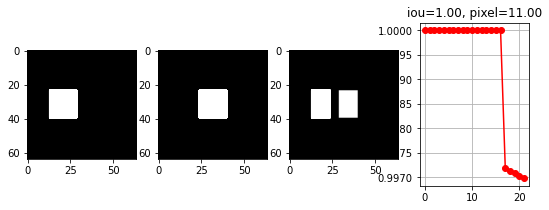

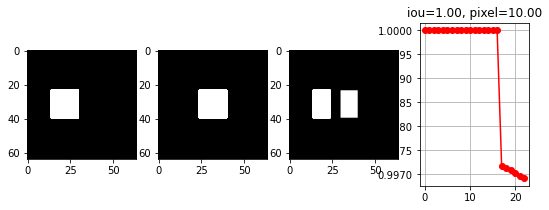

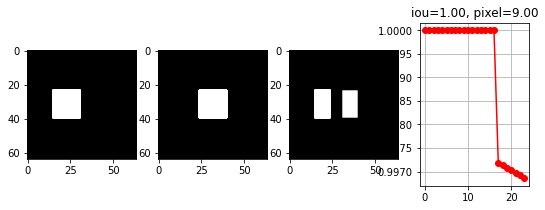

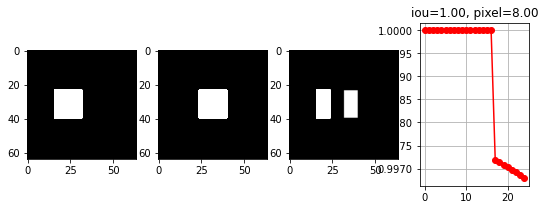

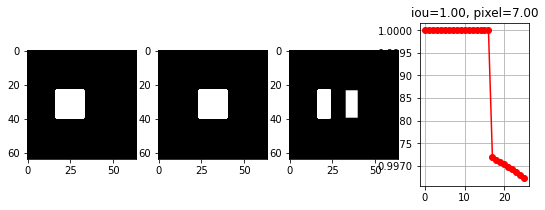

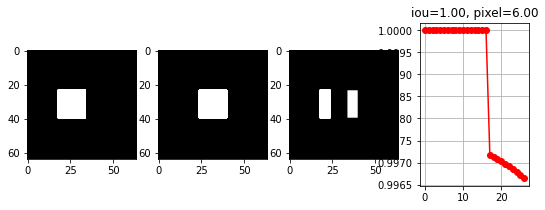

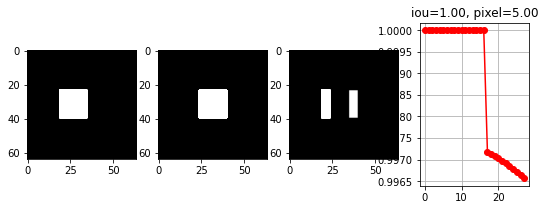

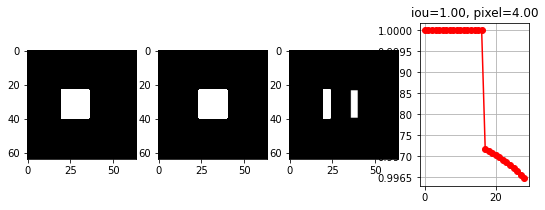

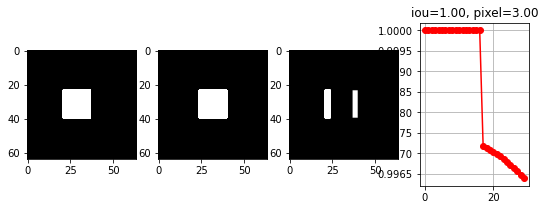

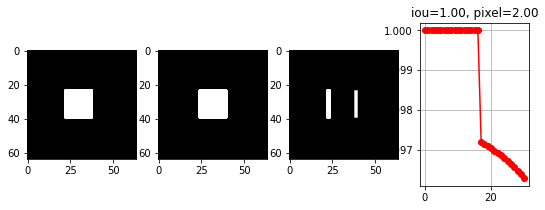

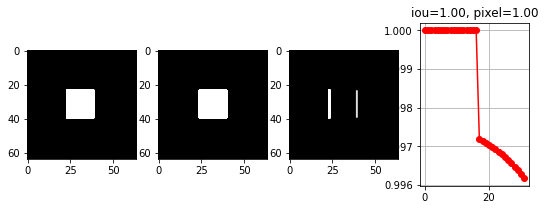

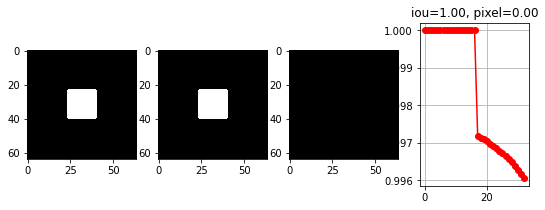

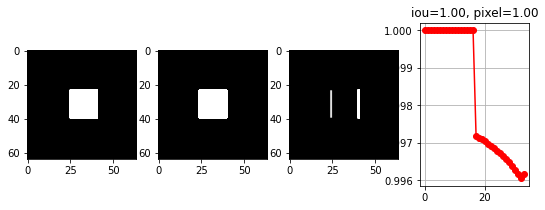

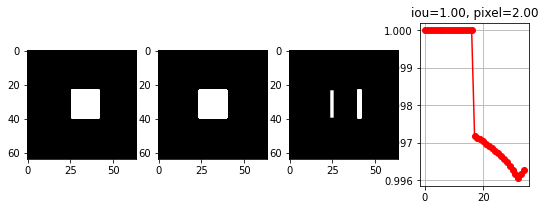

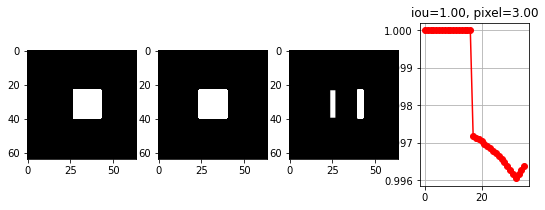

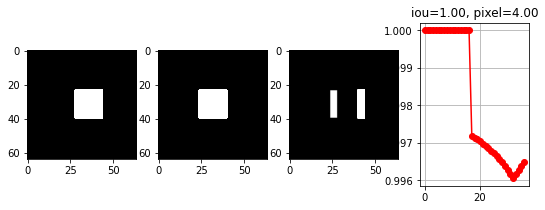

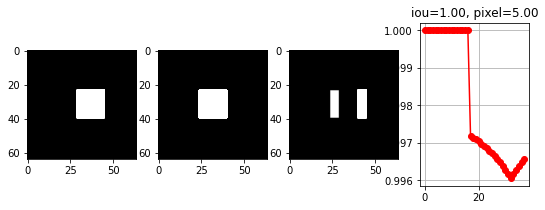

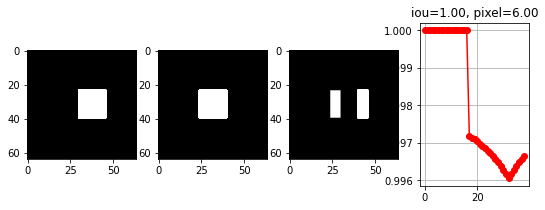

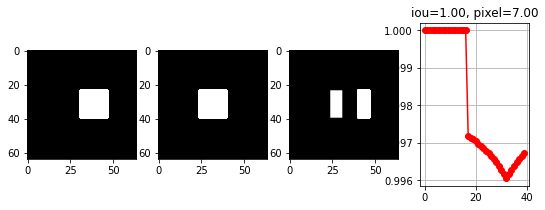

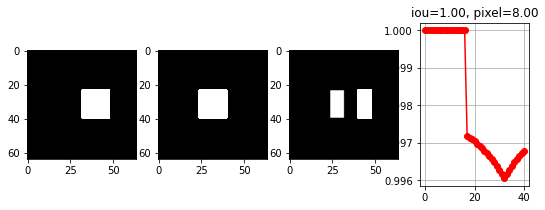

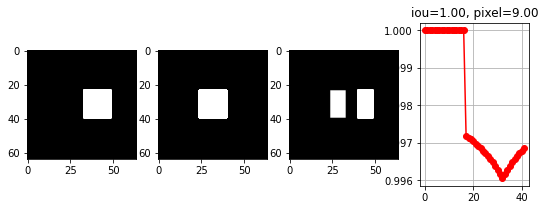

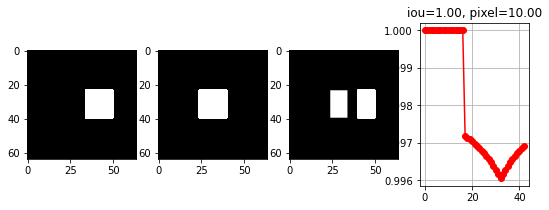

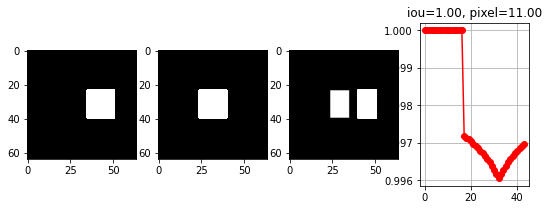

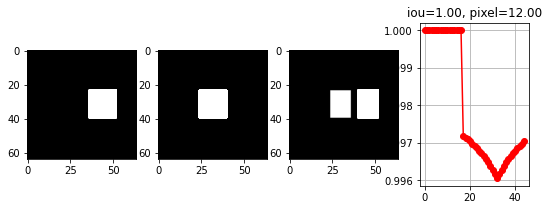

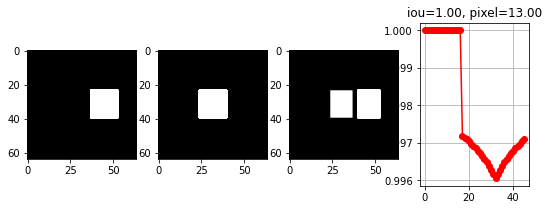

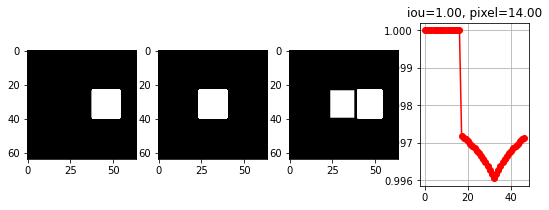

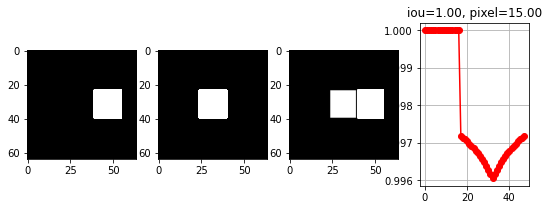

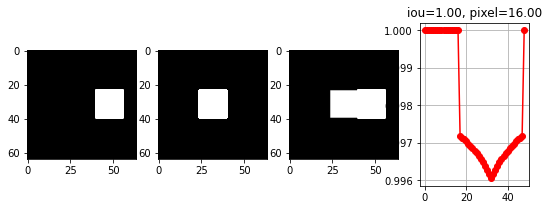

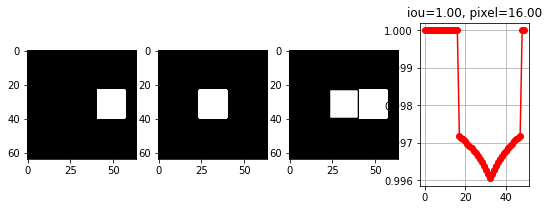

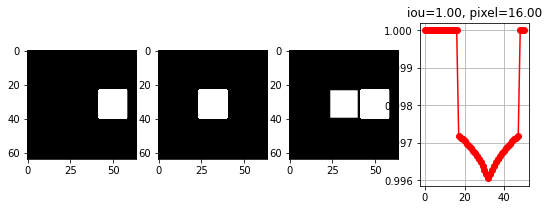

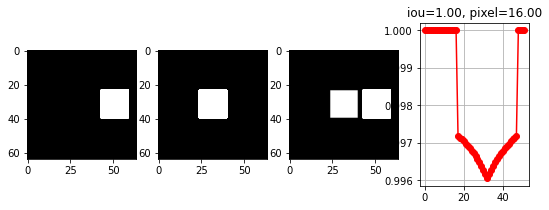

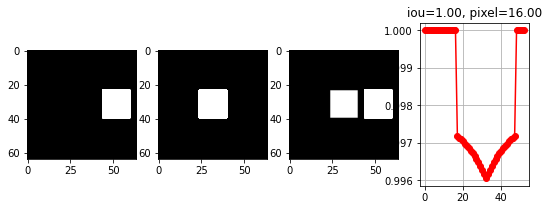

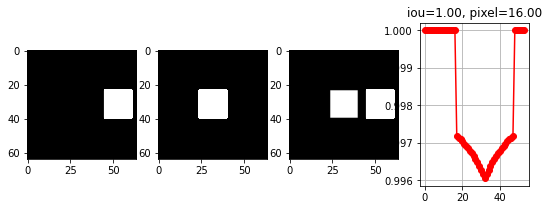

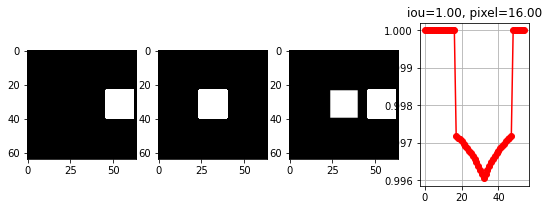

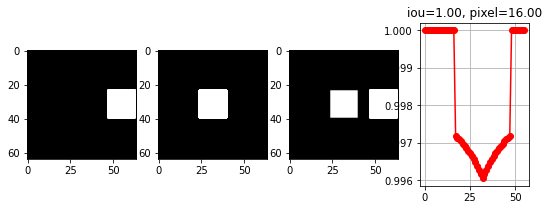

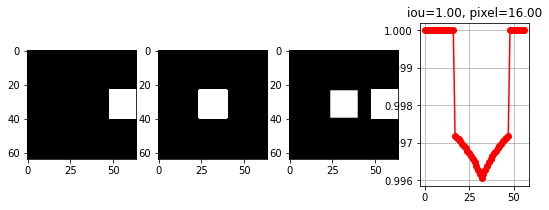

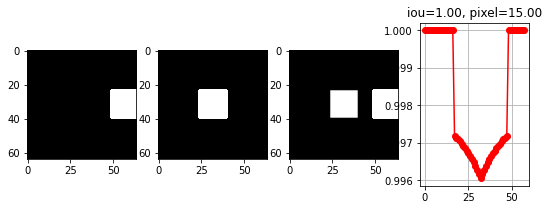

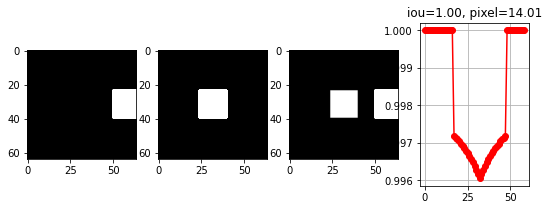

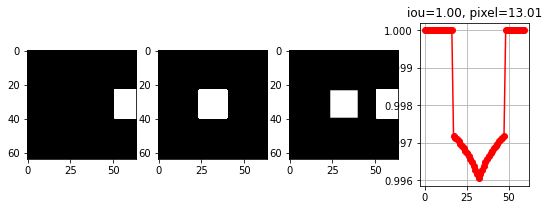

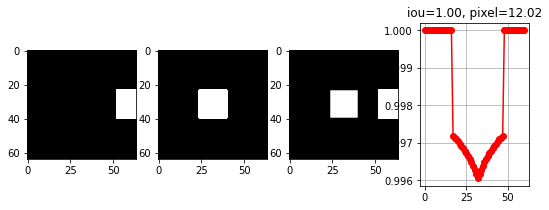

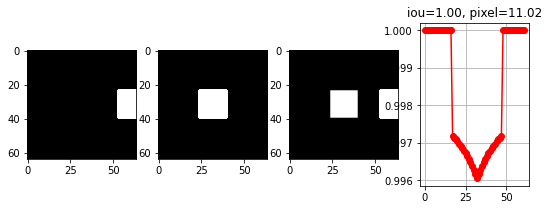

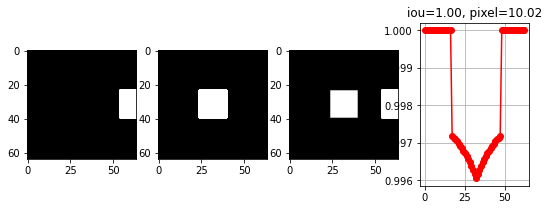

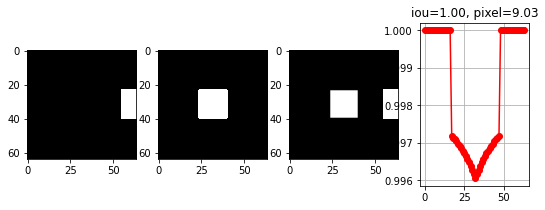

In [13]:
def iou(S1, S2):
    S1S2 = np.multiply(S1, S2)
    S1S2_norm1 = np.linalg.norm(S1S2, ord=1)
    return (1.0 - S1S2_norm1/np.linalg.norm(S1+S2-S1S2))

def pixel_diff(S1, S2):
    return np.mean(np.abs(S1-S2))

S2 = target
ious = []
diffs = []
x = np.arange(len(currents))
for S1 in currents:
    iouv = iou(S1, S2)
    diff = pixel_diff(S1, S2)
    ious.append(iouv)
    diffs.append(diff)
    fig, ax = plt.subplots(1, 4, figsize=(9,3))
    ax[0].imshow(S1, cmap='gray', vmin=0, vmax=1.0)
    ax[1].imshow(S2, cmap='gray', vmin=0, vmax=1.0)
    ax[2].imshow(np.abs(S1-S2), cmap='gray', vmin=0, vmax=1.0)
    ax[3].plot(x[0:len(ious)], ious, marker='o', c='r')
#     ax[3].plot(x[0:len(diffs)], diffs, marker='o', c='b')
    ax[3].grid()
    ax[3].set_title('iou={:.2f}, pixel={:.2f}'.format(iouv, diff))
    plt.show()


1


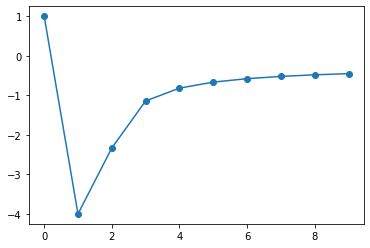

In [8]:
b = 5
a = np.arange(0, 2*b)
ious_ab = []
for i in range(len(a)):
    ai = a[i]
    iou_ab = 1.0 - (np.abs(ai*b))/(np.abs(ai+b-ai*b))
    ious_ab.append(iou_ab)
plt.figure()
plt.plot(a, ious_ab, marker='o')
imin = np.argmin(np.array(ious_ab))
print(imin)
plt.show()